### <center> Examples of Image Decoding and Recovery </center>

In [4]:
# Clone the libraris
Pkg.clone("https://github.com/arsenal9971/FWT.jl.git")
Pkg.clone("https://github.com/arsenal9971/Shearlab.jl.git")

INFO: Cloning Shearlab from https://github.com/arsenal9971/Shearlab.jl.git
INFO: Computing changes...


In [5]:
# We import the libraries
using FWT
import Shearlab
using PyPlot
using Images

In [6]:
# Read Data
n = 256;
# The path of the image
name = "../data_samples/lena.jpg";
data = Shearlab.SLload_image(name, n);
#Rescale image in [0,1] summing the 3 arrays in the RGB format
data = FWT.rescale(sum(data,3));

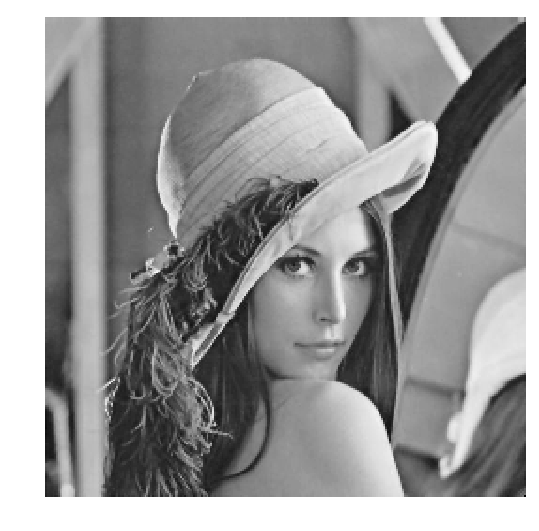

In [7]:
# Reduce one dimension 
data = data[:,:,1];
FWT.imageplot(data);

In [8]:
sizeX = size(data,1);
sizeY = size(data,2);

In [9]:
rows = sizeX;
cols = sizeY;
X = data; 
nScales = 2;

In [10]:
# Compute the corresponding shearlet system
tic()
shearletSystem = Shearlab.SLgetShearletSystem2D(rows,cols,nScales);
toc()

elapsed time: 10.676592099 seconds


10.676592099

In [11]:
# Compute the coefficients
tic()
coeffs = Shearlab.SLsheardec2D(X,shearletSystem);
toc()

elapsed time: 0.346312544 seconds


0.346312544

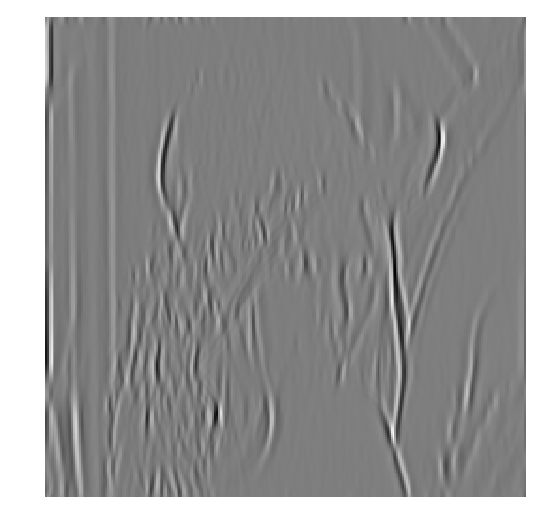

In [12]:
# Look at the third shsearlet coefficient
FWT.imageplot(real(coeffs[:,:,3]))

In [13]:
size(coeffs)

(256,256,17)

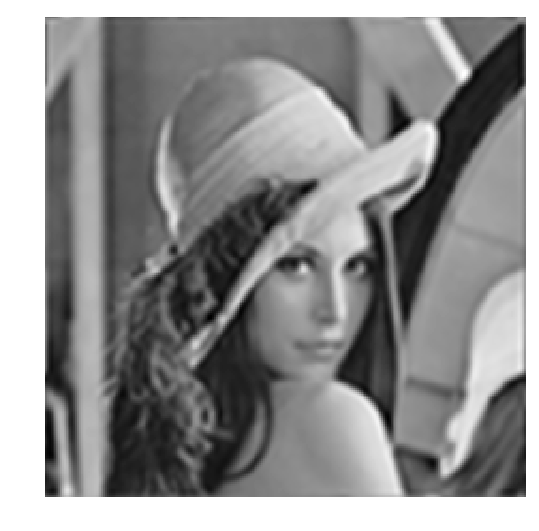

In [14]:
# Look at the last shearlet coefficient
FWT.imageplot(real(coeffs[:,:,17]))

In [15]:
# Make the recovery
tic()
Xrec=Shearlab.SLshearrec2D(coeffs,shearletSystem);
toc()

elapsed time: 0.256119957 seconds


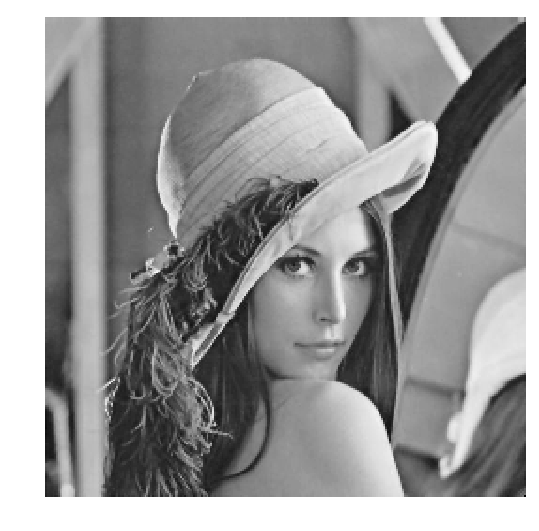

In [16]:
# The recovery is very good
FWT.imageplot(Xrec);